# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Loading Data Frame and Displaying it's content

In [2]:
data =  pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Top 10 Countries with most and least number no.of TV shows and Movies

In [5]:
query1 = data.title.groupby([data.type,data.country]).count()

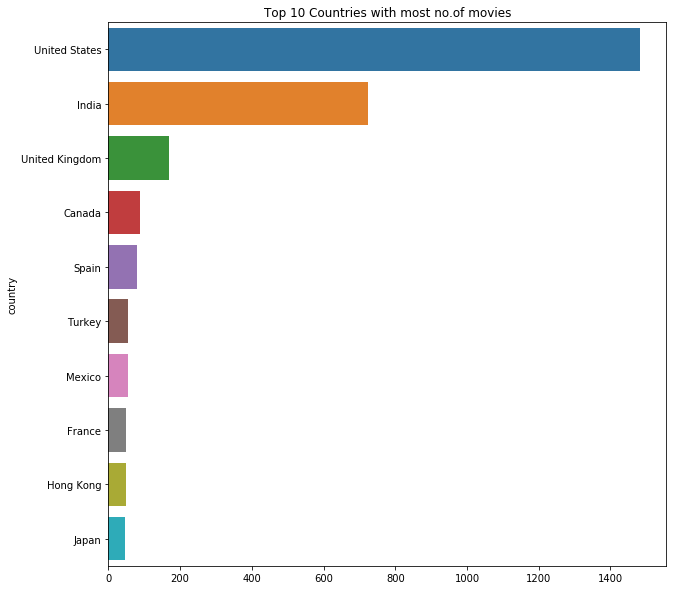

In [6]:
sub_query1 = query1[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 Countries with most no.of movies')
sns.barplot(y = sub_query1.index,x = sub_query1.values)

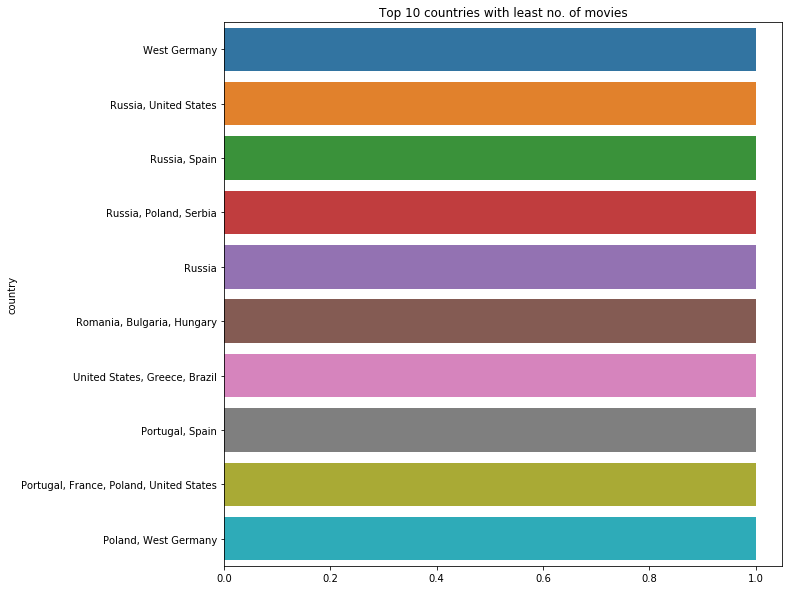

In [7]:
sub_query2 = query1[('Movie',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with least no. of movies')
sns.barplot(y = sub_query2.index,x = sub_query2.values)

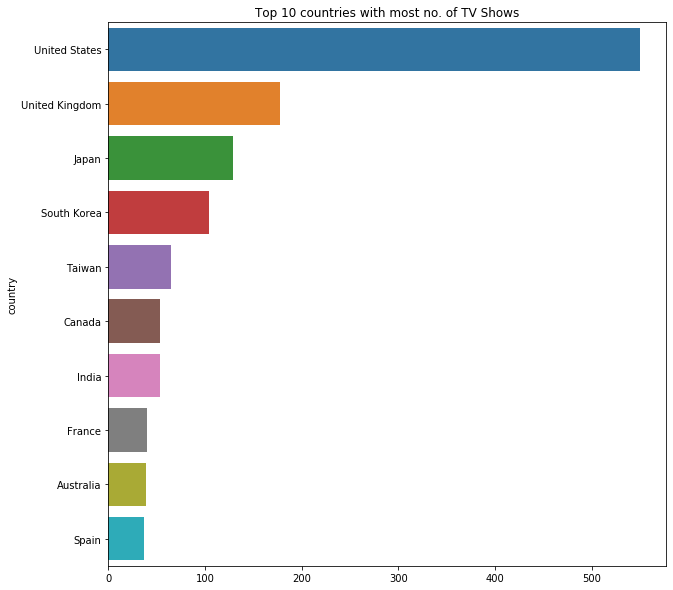

In [8]:
sub_query3 = query1[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with most no. of TV Shows')
sns.barplot(y = sub_query3.index,x = sub_query3.values)

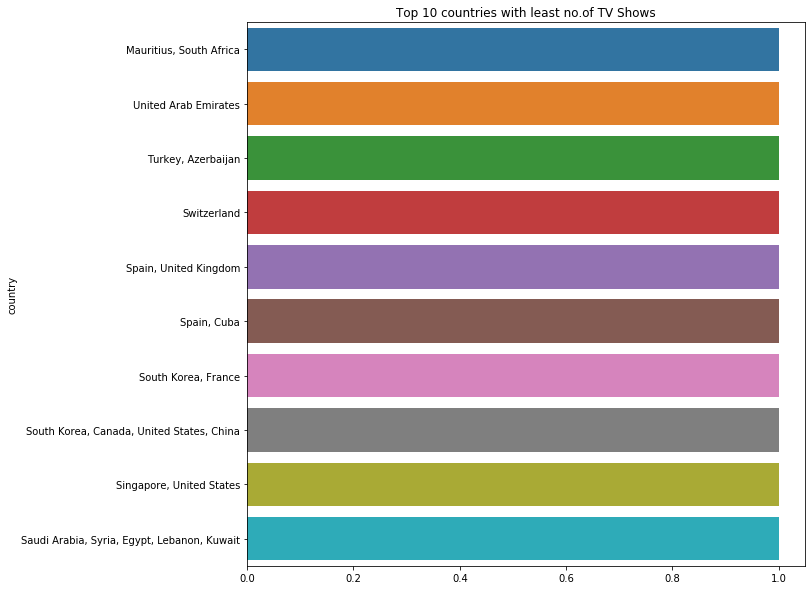

In [9]:
sub_query4 = query1[('TV Show',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with least no.of TV Shows')
sns.barplot(y = sub_query4.index,x = sub_query4.values)

# TV Shows with more no.of seasons

In [10]:
cond = data[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)

In [12]:
query2 = data[cond]
query2.index = np.arange(len(query2))
query2['season']=query2.duration.str[:2]
list1 = list(query2['season'])
for i in range(len(list1)):
    list1[i] = int(list1[i])
query2['season'] = list1

C:\Users\Kelly\holo\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kelly\holo\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'TV Shows no.of seasons Distributions')

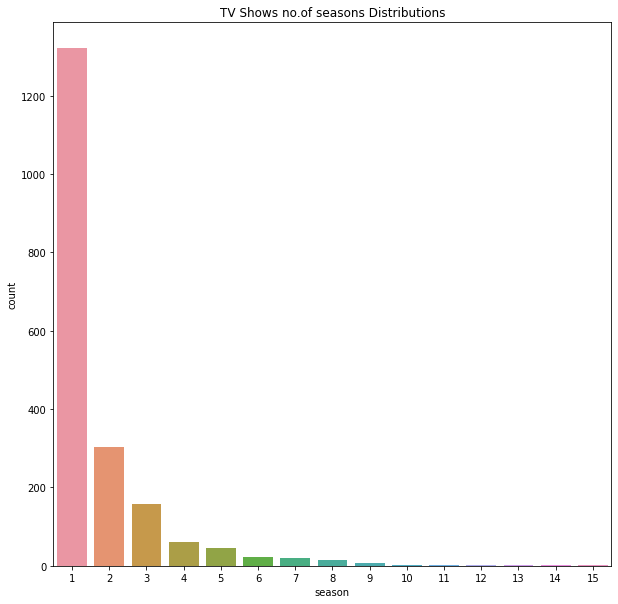

In [13]:
plt.figure(figsize =(10,10))
sns.countplot(x=query2.season)
plt.title('TV Shows no.of seasons Distributions')

Text(0.5, 1.0, 'TV Shows with more no.of seasons')

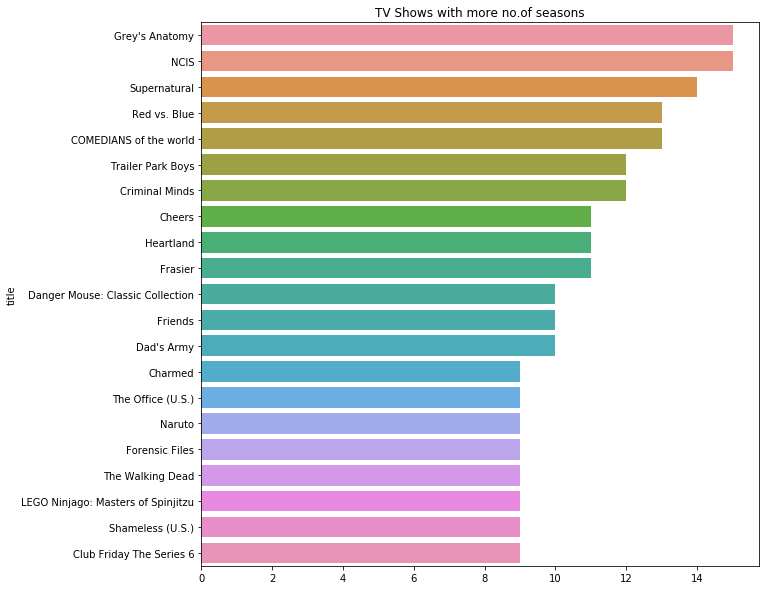

In [14]:
sub_query5 =query2.season.groupby(query2.title).sum().sort_values(ascending = False)
plt.figure(figsize =(10,10))
sns.barplot(y=sub_query5[sub_query5>=9].index,x = sub_query5[sub_query5>=9].values)
plt.title('TV Shows with more no.of seasons')

# Movie Duration Distribution

In [15]:
cond = data[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)
query3 = data[~cond]
query3.index = np.arange(len(query3))
list1 =[]
for i in query3.duration:
    if i[2]=='m':
        list1.append(int(i[:2]))
    else:
        list1.append(int(i[:3]))
query3['duration_'] = list1        

C:\Users\Kelly\holo\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Movie Duration Distribution')

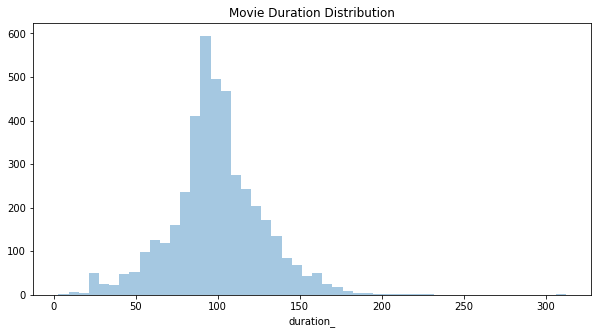

In [16]:
plt.figure(figsize =(10,5))
sns.distplot(query3.duration_,kde =False)
plt.title('Movie Duration Distribution')

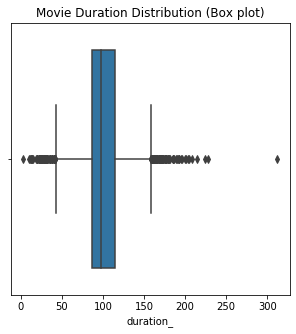

In [17]:
plt.figure(figsize =(5,5))
sns.boxplot(x = query3.duration_)
plt.title('Movie Duration Distribution (Box plot)')
plt.show()

# Top 10 years with most no.of movies and series

In [18]:
query4 = data.title.groupby([data.type,data.release_year]).count()

Text(0.5, 1.0, 'Top 10 years with most no.of movies')

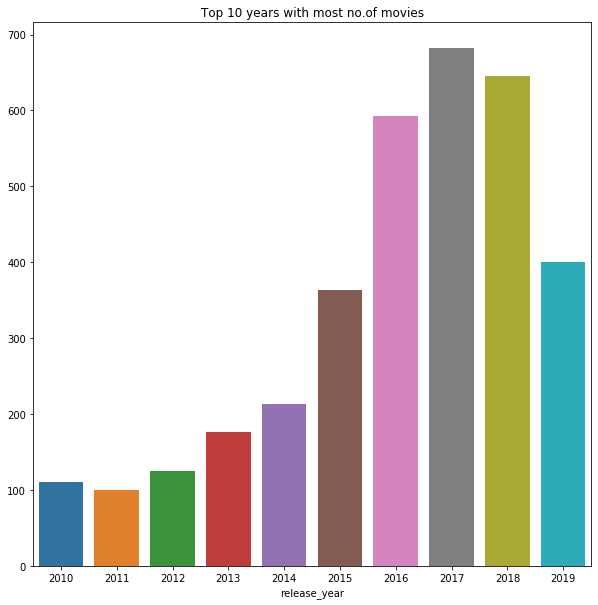

In [19]:
sub_query6 = query4[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query6.index,y = sub_query6.values)
plt.title('Top 10 years with most no.of movies')

Text(0.5, 1.0, 'Top 10 years with most no.of TV Shows')

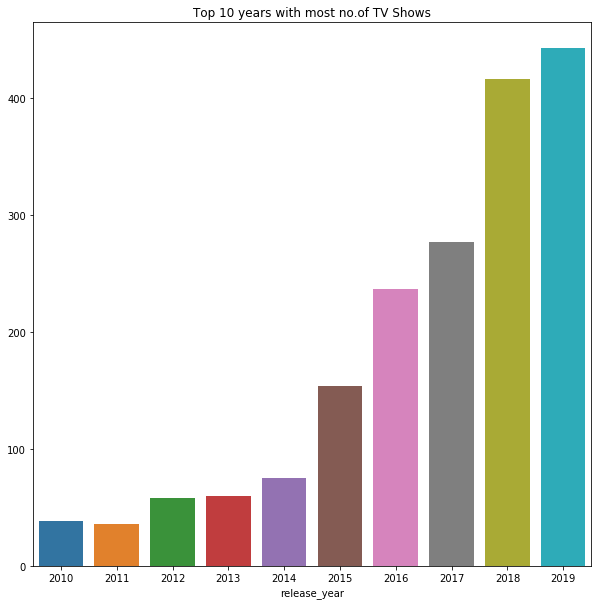

In [20]:
sub_query7 = query4[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query7.index,y = sub_query7.values)
plt.title('Top 10 years with most no.of TV Shows')

# Top 10 country with most no. of movies and series released on the most no. of movies and series released year

In [21]:
query5 = data.title.groupby([data.type,data.release_year,data.country]).count()

Text(0.5, 1.0, 'Top 10 country with most no.of movies released on the most no.of movies released year')

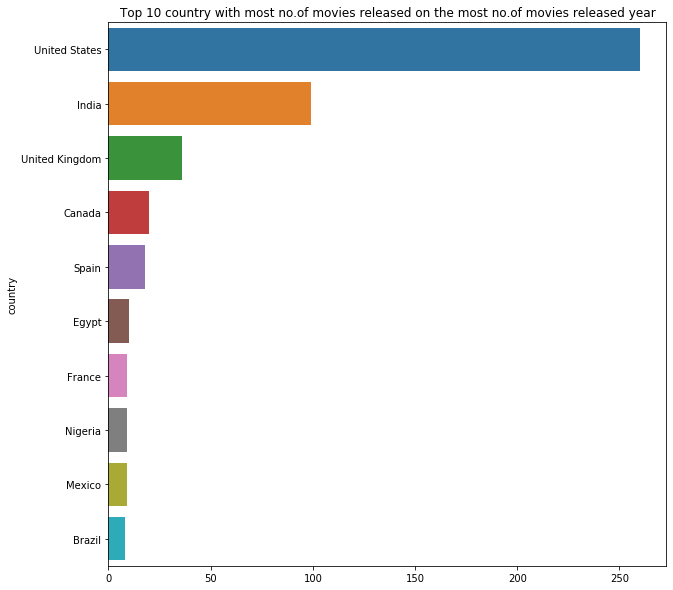

In [22]:
sub_query8=query5[('Movie',2017,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(y = sub_query8.index,x = sub_query8.values)
plt.title('Top 10 country with most no.of movies released on the most no.of movies released year')

Text(0.5, 1.0, 'Top 10 country with most no.of TV Shows released on the most no.of series released year')

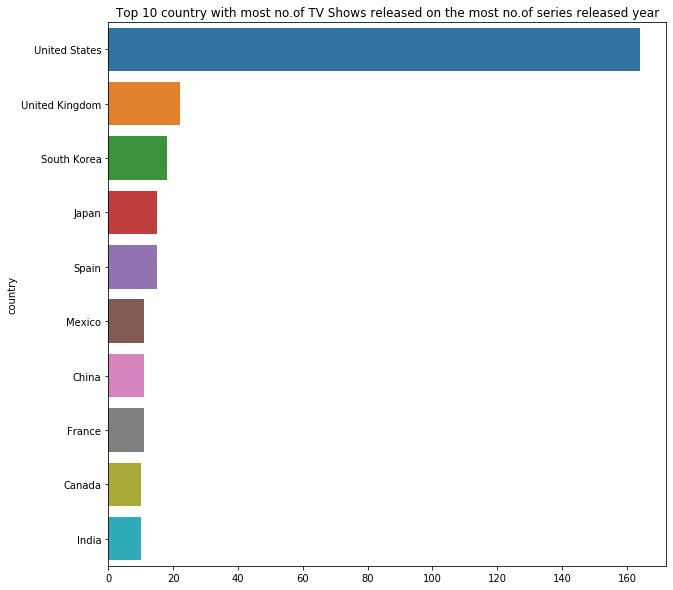

In [23]:
sub_query9=query5[('TV Show',2019,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(y = sub_query9.index,x = sub_query9.values)
plt.title('Top 10 country with most no.of TV Shows released on the most no.of series released year')

# Director with most no.of movies and series

Text(0.5, 1.0, 'Director with most no.of movies')

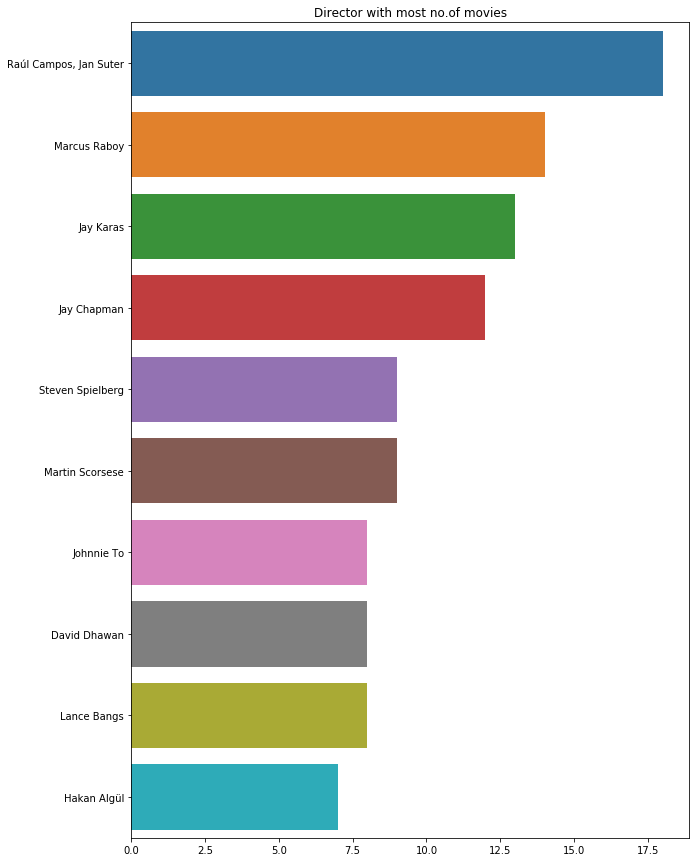

In [24]:
query6 = data[~cond]
query6.index = np.arange(len(query6))
sub_query10 = query6.director.value_counts()[:10]
plt.figure(figsize=(10,15))
sns.barplot(y = sub_query10.index,x = sub_query10.values)
plt.title('Director with most no.of movies')

Text(0.5, 1.0, 'Director with most no.of TV Shows')

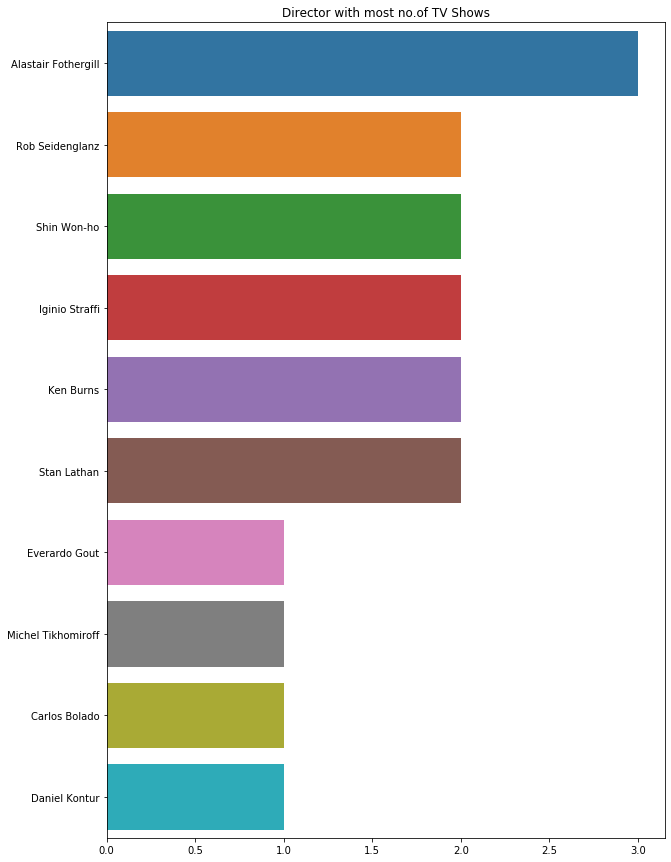

In [25]:
query7 = data[cond]
query7.index = np.arange(len(query7))
sub_query11 = query7.director.value_counts()[:10]
plt.figure(figsize=(10,15))
sns.barplot(y = sub_query11.index,x = sub_query11.values)
plt.title('Director with most no.of TV Shows')

# Category and Rating

Text(0.5, 1.0, 'Rating-type Distribution')

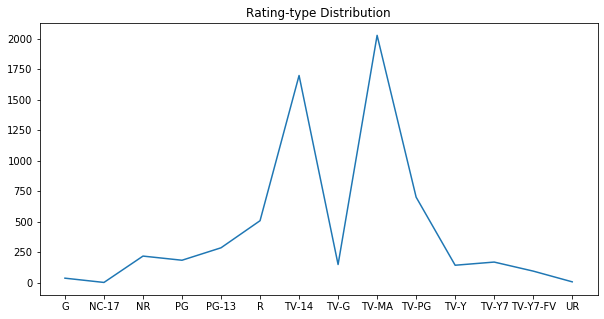

In [26]:
plt.figure(figsize =(10,5))
sns.lineplot(x = data.rating.value_counts().index,y = data.rating.value_counts().values)
plt.title('Rating-type Distribution')

In [27]:
query8 =data.listed_in.value_counts().sort_values(ascending =False)
query8= query8[:5]

Text(0.5, 1.0, 'Top 5 Category Distribution')

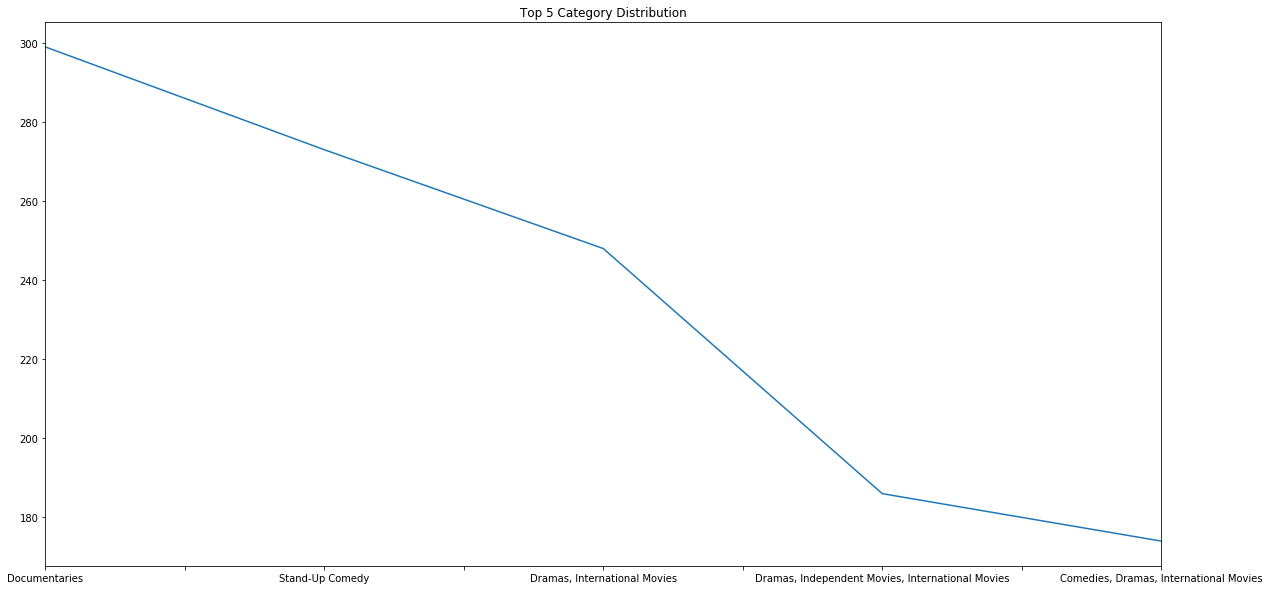

In [28]:
plt.figure(figsize =(20,10))
query8.plot()
plt.title('Top 5 Category Distribution')

# Category verses Rating for Top 3 Categories

In [29]:
data.listed_in.value_counts()[:3]

Documentaries                   299
Stand-Up Comedy                 273
Dramas, International Movies    248
Name: listed_in, dtype: int64

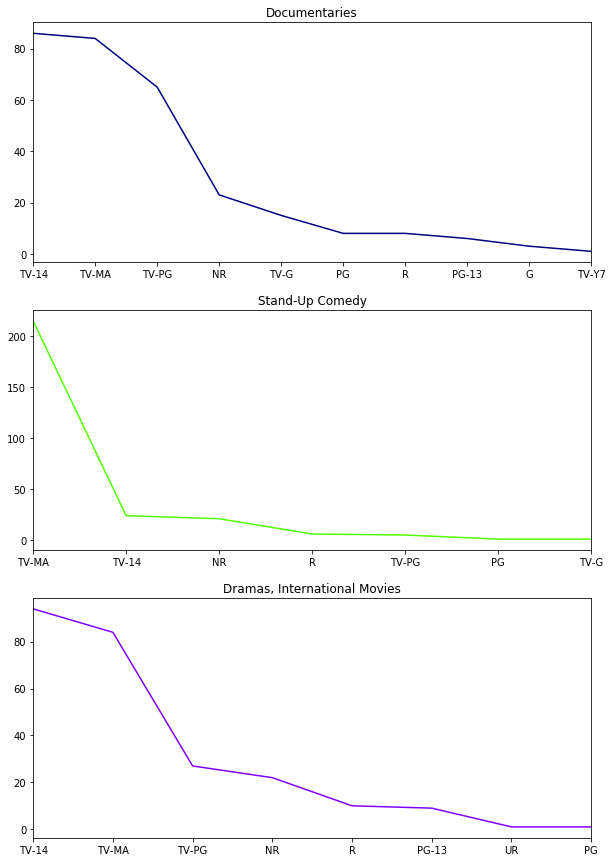

In [31]:
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
data[data['listed_in']== 'Documentaries'].rating.value_counts().plot(colormap='jet',title='Documentaries')
plt.subplot(3,1,2)
data[data['listed_in']== 'Stand-Up Comedy'].rating.value_counts().plot(colormap='prism_r',title = 'Stand-Up Comedy')
plt.subplot(3,1,3)
data[data['listed_in']== 'Dramas, International Movies'].rating.value_counts().plot(colormap='rainbow',title = 'Dramas, International Movies')

# Top 10 Directors having most no.of movies and TV Shows grouped by rating

Text(0.5, 1.0, 'Top 10 Directors having most no.of movies grouped by rating')

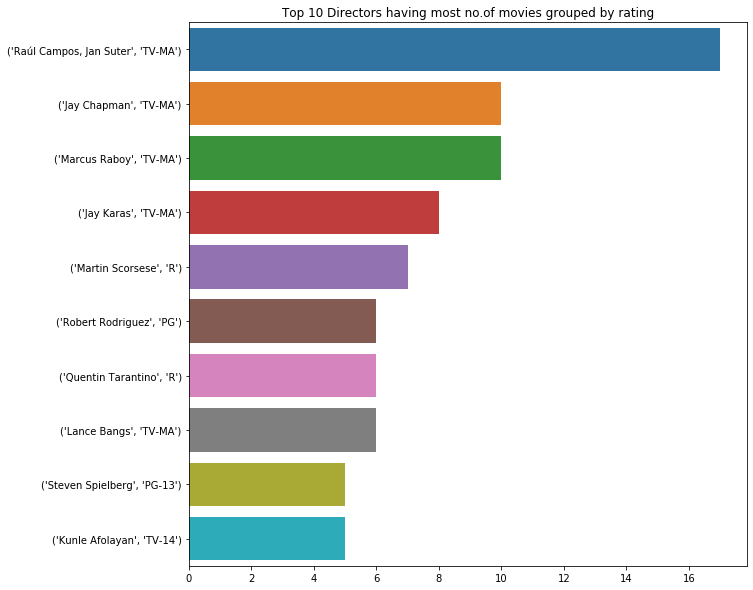

In [32]:
plt.figure(figsize=(10,10))
query9 = data[~cond]
query9 = query9.title.groupby([query9['director'],query9['rating']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query9.index,x = query9.values)
plt.title('Top 10 Directors having most no.of movies grouped by rating')

Text(0.5, 1.0, 'Top 10 Directors having most no.of TV shows grouped by rating')

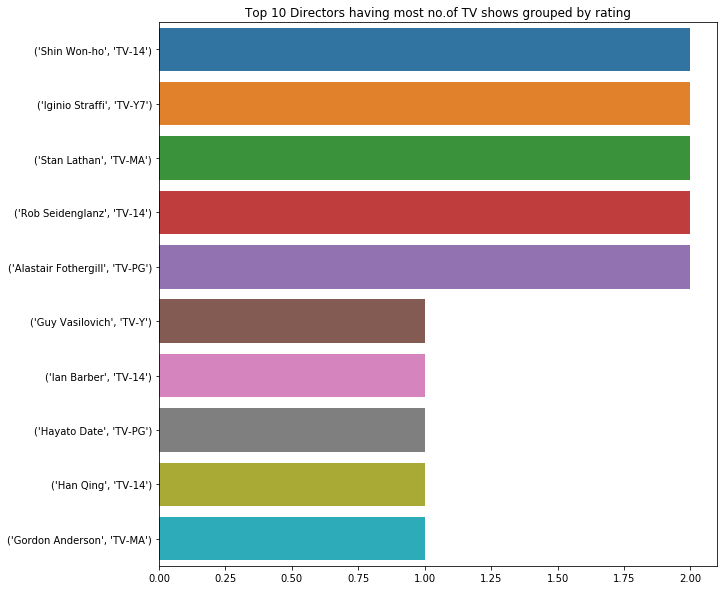

In [33]:
plt.figure(figsize=(10,10))
query10 = data[cond]
query10 = query10.title.groupby([query10['director'],query10['rating']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query10.index,x = query10.values)
plt.title('Top 10 Directors having most no.of TV shows grouped by rating')

# Top 10 Directors having most no.of movies grouped by category

Text(0.5, 1.0, 'Top 10 Directors having most no.of movies grouped by category')

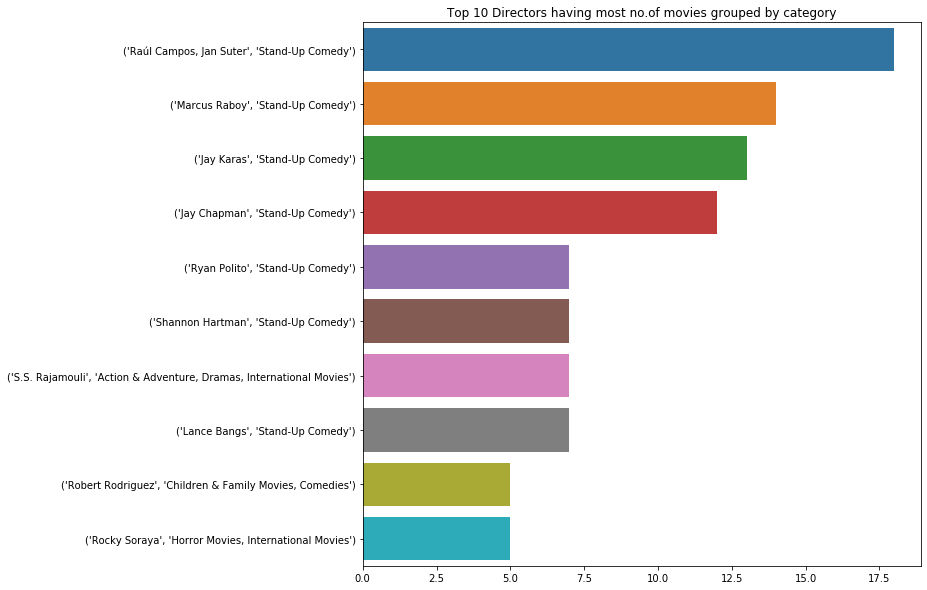

In [34]:
plt.figure(figsize=(10,10))
query11 = data[~cond]
query11 = query11.title.groupby([query11['director'],query11['listed_in']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query11.index,x = query11.values)
plt.title('Top 10 Directors having most no.of movies grouped by category')

Text(0.5, 1.0, 'Top 10 Directors having most no.of TV Shows grouped by category')

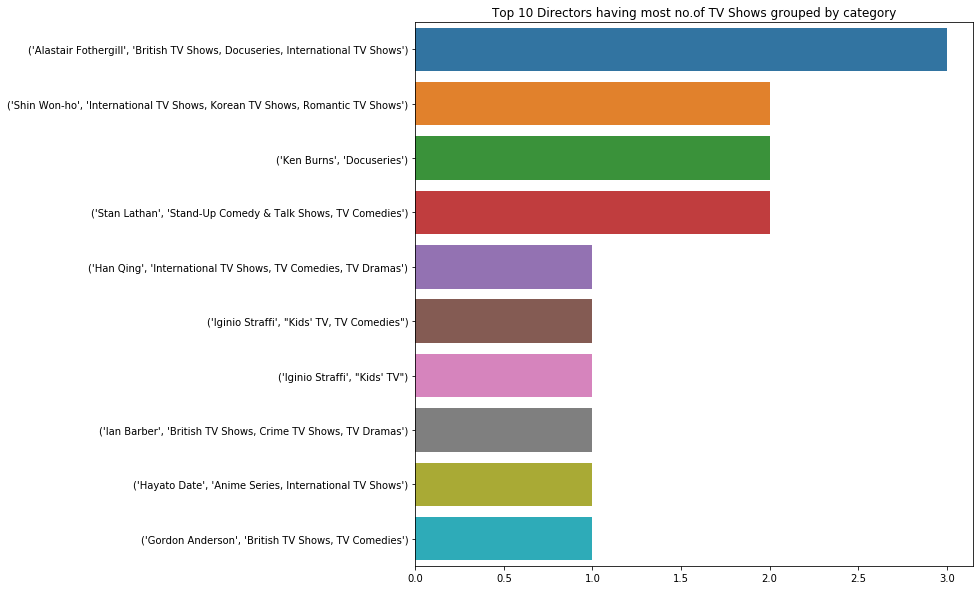

In [35]:
plt.figure(figsize=(10,10))
query12 = data[cond]
query12 = query12.title.groupby([query12['director'],query12['listed_in']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query12.index,x = query12.values)
plt.title('Top 10 Directors having most no.of TV Shows grouped by category')